In [1]:
import pandas as pd
import networkx as nx
import cpalgorithm as cp
import matplotlib.pyplot as plt

## Load Data

In [2]:
"""
- These algorithms focus on real-world data concerning Facebook large page-page network.

- It is an one-mode, undirected, unweighted network including 22,470 nodes and 171,002 edges. 
Nodes represent official Facebook pages while the edges are mutual likes between sites.

- For further details about the data refer to the database: 
http://snap.stanford.edu/data/facebook-large-page-page-network.html
"""

# read data from csv.file
df = pd.read_csv('facebook.csv')

In [3]:
# preview data
df.head()

,id_1,id_2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829


In [4]:
# check types of all columns
df.dtypes

id_1    int64
id_2    int64
dtype: object

In [5]:
# convert types of all columns from int to object
df1 = df.apply(lambda x: x.astype(str))

# recheck types of all columns
df1.dtypes

id_1    object
id_2    object
dtype: object

In [6]:
# load network from pandas
G = nx.from_pandas_edgelist(df1, 'id_1', 'id_2')

## Borgatti and Everett Algorithm

In [9]:
# create an object called BE
be = cp.BE()

# pass the graph to detect() method
be.detect(G)

# retrive the result of the algorithm
c = be.get_pair_id() # community classification
x = be.get_coreness() # core-periphery classification

# convert dictionary to a dataframe
df_be = pd.DataFrame.from_dict(x, orient = 'index', columns = ['Coreness'])

# reset index of the dataframe
df_be.reset_index(inplace=True)

# rename column 
df_be.rename(columns={'index': 'Node_be'}, inplace=True)

# group and count the number of nodes that belong to core and periphery respectively
df_be_Count = pd.DataFrame(df_be.groupby('Coreness')['Node_be'].count())

# print dataframe
df_be_Count

,Node_be
Coreness,
0.0,22081
1.0,389


## LowRank-Core Algorithm

In [76]:
# create an object called LowRankCore
lrc = cp.LowRankCore()

# pass the graph to detect() method
lrc.detect(G)

# retrive the result of the algorithm
c1 = lrc.get_pair_id() #community classification
x1 = lrc.get_coreness() #core-periphery classification

# convert dictionary to a dataframe
df_lrc = pd.DataFrame.from_dict(x1, orient = 'index', columns = ['Coreness'])

# reset index of the dataframe
df_lrc.reset_index(inplace=True)

# rename column 
df_lrc.rename(columns={'index': 'Node_lrc'}, inplace=True)

# group and count the number of nodes that belong to core and periphery respectively
df_lrc_Count = pd.DataFrame(df_lrc.groupby('Coreness')['Node_lrc'].count())

# print dataframe
df_lrc_Count

,Node_lrc
Coreness,
0,20223
1,2247


## LapSgn-Core Algorithm

In [78]:
# create an object called LapSgnCore
lsc = cp.LapSgnCore()

# pass the graph to detect() method
lsc.detect(G)

# retrive the result of the algorithm
c2 = lsc.get_pair_id() #community classification
x2 = lsc.get_coreness() #core-periphery classification

# convert dictionary to a dataframe
df_lsc = pd.DataFrame.from_dict(x2, orient = 'index', columns = ['Coreness'])

# reset index of the dataframe
df_lsc.reset_index(inplace=True)

# rename column 
df_lsc.rename(columns={'index': 'Node_lsc'}, inplace=True)

# group and count the number of nodes that belong to core and periphery respectively
df_lsc_count = pd.DataFrame(df_lsc.groupby('Coreness')['Node_lsc'].count())

# print dataframe
df_lsc_count

,Node_lsc
Coreness,
0.0,11290
1.0,11180


## Algorithm Comparison

In [79]:
# combiene the results of algorithm
result = pd.concat([df_be_Count, df_lrc_Count, df_lsc_count], axis=1)
result

,Node_be,Node_lrc,Node_lsc
Coreness,,,
0.0,22081,20223,11290
1.0,389,2247,11180


In [80]:
# assign objects to values
np_be = result.iloc[0, 0]
nc_be = result.iloc[1, 0]
np_lrc = result.iloc[0, 1]
nc_lrc = result.iloc[1, 1]
np_lsc = result.iloc[0, 2]
nc_lsc = result.iloc[1, 2]

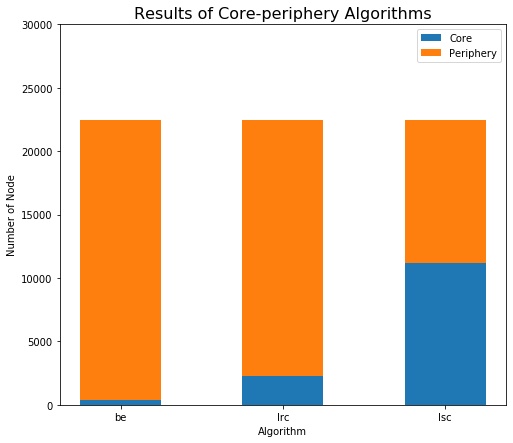

In [81]:
# create variables to plot the results
core = (nc_be, nc_lrc, nc_lsc)
per = (np_be, np_lrc, np_lsc)

# params for the visualization
c_n = 3
c_pos = [0, 1, 2] 
barWidth = 0.5        

# creat framework for the figure
fig = plt.figure(figsize = (8, 7))

# populate the figure
ax = fig.add_subplot(1, 1, 1)

# plot the data
p1 = ax.bar(ind, core, label='Core', width = barWidth)
p2 = ax.bar(ind, per, bottom=core,  label='Periphery', width = barWidth)
plt.ylim(0,30000)

# axes labels
ax.set_xlabel('Algorithm')
ax.set_ylabel('Number of Node')

# axes ticks
ax.set_xticks((0, 1, 2))
ax.set_xticklabels(('be','lrc','lsc'))

# title
ax.set_title("Results of Core-periphery Algorithms", fontsize=16)

# legend
ax.legend(loc='upper right')

# save image
plt.savefig('algorithm.jpg')

plt.show()